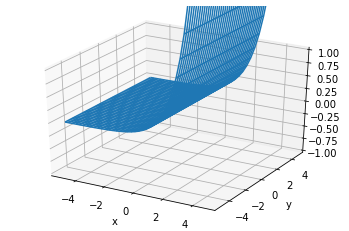

In [6]:
import phys
import numpy as np
import phys.light
import phys.newton
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cl_n = "0.000000001 * exp(r0[gid] - 5)"

def n(x, y):
    return 0.1 * np.e ** x

fig = plt.figure()
ax = fig.gca(projection='3d')
x, y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
z = n(x, y)
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlim(-1, 1)
ax.plot_wireframe(x, y, z)
plt.show()

In [7]:
sim = phys.Simulation(cl_on=True, exit=lambda cond: cond.t >= 2.500)

sim.add_step(2, phys.UpdateTimeStep(lambda c: 0.005))
sim.add_step(1, phys.newton.NewtonianKinematicsStep())
sim.add_step(3, phys.light.ScatterSphericalStep(0.000000000000001, 0.0000000000000000001, wavelength_dep_scattering=True,variable_n=True,variable_n_fn=cl_n))
tp = phys.light.TracePathMeasureStep(None)
sim.add_step(0, tp)

sim.add_objs(phys.light.generate_photons(1000, bins=10, min=phys.light.E_from_wavelength(200e-9), max=phys.light.E_from_wavelength(700e-9)))

In [8]:
sim.start()

while sim.running:
    time.sleep(1)
    print(sim.get_state())

{'objects': 1000, 't': 0.075, 'dt': 0.005, 'run_time': 1.0242033004760742}
{'objects': 1000, 't': 0.18000000000000008, 'dt': 0.005, 'run_time': 2.0509207248687744}
{'objects': 1000, 't': 0.28500000000000014, 'dt': 0.005, 'run_time': 3.0571506023406982}
{'objects': 1000, 't': 0.39500000000000024, 'dt': 0.005, 'run_time': 4.0683512687683105}
{'objects': 1000, 't': 0.5050000000000003, 'dt': 0.005, 'run_time': 5.101547956466675}
{'objects': 1000, 't': 0.6150000000000004, 'dt': 0.005, 'run_time': 6.119207859039307}
{'objects': 1000, 't': 0.7250000000000005, 'dt': 0.005, 'run_time': 7.125877618789673}
{'objects': 1000, 't': 0.8350000000000006, 'dt': 0.005, 'run_time': 8.166295051574707}
{'objects': 1000, 't': 0.9450000000000007, 'dt': 0.005, 'run_time': 9.197522163391113}
{'objects': 1000, 't': 1.0549999999999995, 'dt': 0.005, 'run_time': 10.216541290283203}
{'objects': 1000, 't': 1.169999999999997, 'dt': 0.005, 'run_time': 11.245489358901978}
{'objects': 1000, 't': 1.2749999999999948, 'dt':

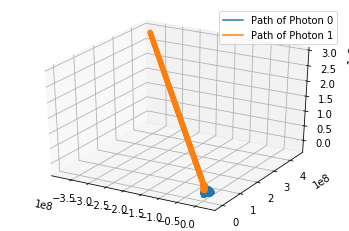

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in [0, 1]:
    xs = [x[0] for x in tp.data[1 + i][1:]]
    ys = [x[1] for x in tp.data[1 + i][1:]]
    zs = [x[2] for x in tp.data[1 + i][1:]]
    ax.plot(xs, ys, zs, label="Path of Photon " + str(i))
    ax.scatter(xs, ys, zs)
ax.legend()

plt.show()

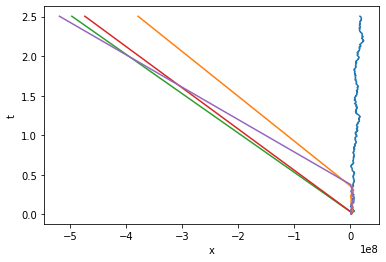

In [10]:
for i in range(0, 5):
    plt.plot([x[0] for x in tp.data[1 + i][1:]], tp.data[0][1:])
    plt.xlabel("x")
    plt.ylabel("t")

plt.show()